In [34]:
#This program generates the bar plot of FIG.3C 
#Mean firing rates of the different populations in the stimulated condition (input to E4).
#Comparison between experimental data and 10 runs of the cortical column model.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [36]:
#Importing some info I need for this program
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [37]:
#------------------------------------------------------------------------------
#Function to import the files of the spikes of each group of cells
#------------------------------------------------------------------------------
def take_files(a):
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [38]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups (I record from all)
#------------------------------------------------------------------------------
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    #print(runtime)
    
    #Total number of spikes and rate for each group
    
    #Layer 1
    tot_sp_vip1 =  S_vip1num_spikes  
    rate_vip1= tot_sp_vip1/(N1*runtime)

    #Layer 2/3
    tot_sp_e23 =  S_e23num_spikes
    #print(tot_sp_e23)
    #print(N[0][0])
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)

    #Layer 4
    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)
    
    #Layer 5
    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)
    
    #Layer 6
    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6,rate_vip1

In [39]:
#------------------------------------------------------------------------------
#Matrices that will contain the firing rate of all the 10 SIMULATION, for each group of cell. 
#------------------------------------------------------------------------------
#Initialize the lists
rate_e23_all=[]
rate_e4_all=[]
rate_e5_all=[]
rate_e6_all=[]
rate_pv23_all=[]
rate_pv4_all=[]
rate_pv5_all=[]
rate_pv6_all=[]
rate_sst23_all=[]
rate_sst4_all=[]
rate_sst5_all=[]
rate_sst6_all=[]
rate_vip23_all=[]
rate_vip4_all=[]
rate_vip5_all=[]
rate_vip6_all=[]
rate_vip1_all=[]
#I import all the files in each folder named i-NUMBER 
for i in ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10']:
    folder_name='simulations_data/INPUTe4_runs/'
    #Import
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_name+i+'/Sp_1')
   
    #I compute the FR calling the function
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1,rate_vip1_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)

    #Append to the list
    rate_e23_all.append(rate_e23_1)
    rate_e4_all.append(rate_e4_1)
    rate_e5_all.append(rate_e5_1)
    rate_e6_all.append(rate_e6_1)
    rate_pv23_all.append(rate_pv23_1)
    rate_pv4_all.append(rate_pv4_1)
    rate_pv5_all.append(rate_pv5_1)
    rate_pv6_all.append(rate_pv6_1)
    rate_sst23_all.append(rate_sst23_1)
    rate_sst4_all.append(rate_sst4_1)
    rate_sst5_all.append(rate_sst5_1)
    rate_sst6_all.append(rate_sst6_1)
    rate_vip23_all.append(rate_vip23_1)
    rate_vip4_all.append(rate_vip4_1)
    rate_vip5_all.append(rate_vip5_1)
    rate_vip6_all.append(rate_vip6_1)
    rate_vip1_all.append(rate_vip1_1)

-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.604167
rate_e23: 0.713053 rate_pv23: 7.158974 rate_sst23: 9.588652 rate_vip23: 17.542056
rate_e4: 14.644884 rate_pv4: 9.612245 rate_sst4: 2.056604 rate_vip4: 3.086420
rate_e5: 2.579847 rate_pv5: 15.793651 rate_sst5: 8.107143 rate_vip5: 18.060606
rate_e6: 4.472420 rate_pv6: 11.464052 rate_sst6: 6.117647 rate_vip6: 4.245614
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.656250
rate_e23: 0.750000 rate_pv23: 7.215385 rate_sst23: 9.198582 rate_vip23: 17.517134
rate_e4: 15.022442 rate_pv4: 9.843537 rate_sst4: 1.867925 rate_vip4: 2.506173
rate_e5: 2.568601 rate_pv5: 15.936508 rate_sst5: 8.000000 rate_vip5: 18.575758
rate_e6: 4.479282 rate_pv6: 11.375817 rate_sst6: 6.013072 rate_vip6: 4.491228
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.687500
rate_e23: 0.685545 rate_pv23: 6.902564 rate_sst23: 8.340426 

In [40]:
#Mean of all the 10 simulations for each group
m_e23=np.mean(rate_e23_all)
m_e4=np.mean(rate_e4_all)
m_e5=np.mean(rate_e5_all)
m_e6=np.mean(rate_e6_all)

m_pv23=np.mean(rate_pv23_all)
m_pv4=np.mean(rate_pv4_all)
m_pv5=np.mean(rate_pv5_all)
m_pv6=np.mean(rate_pv6_all)


m_sst23=np.mean(rate_sst23_all)
m_sst4=np.mean(rate_sst4_all)
m_sst5=np.mean(rate_sst5_all)
m_sst6=np.mean(rate_sst6_all)


m_vip23=np.mean(rate_vip23_all)
m_vip4=np.mean(rate_vip4_all)
m_vip5=np.mean(rate_vip5_all)
m_vip6=np.mean(rate_vip6_all)

m_vip1=np.mean(rate_vip1_all)

In [41]:
#Array containing the mean of 10 simulations, one value for each population
m_all=np.array([m_e23,m_pv23,m_sst23,m_vip23,
        m_e4,m_pv4,m_sst4,m_vip4,
         m_e5,m_pv5,m_sst5,m_vip5,
         m_e6,m_pv6,m_sst6,m_vip6])

FR_all_mean = m_all.reshape(4,4)
print(FR_all_mean)
#print(len(FR_all_mean))

# f=open("simulations_data/INPUTe4_runs/FR_all_input4e.txt",'w+') #create the file
# for i in range(0,len(FR_all_mean)):
#     for j in range(0,len(FR_all_mean)):
#         f.write('%f ' %FR_all_mean[i][j])
#     f.write('\n')
# f.close()

[[ 0.72632147  7.17435897  9.00921986 17.60436137]
 [14.91462046  9.94319728  2.09308176  2.90123457]
 [ 2.58938372 15.88571429  7.86666667 18.13939394]
 [ 4.44697809 11.46013072  6.33627451  4.33684211]]


In [42]:
#Standard deviations of 10 simulations for each group
s_e23=np.std(rate_e23_all)
s_e4=np.std(rate_e4_all)
s_e5=np.std(rate_e5_all)
s_e6=np.std(rate_e6_all)

s_pv23=np.std(rate_pv23_all)
s_pv4=np.std(rate_pv4_all)
s_pv5=np.std(rate_pv5_all)
s_pv6=np.std(rate_pv6_all)


s_sst23=np.std(rate_sst23_all)
s_sst4=np.std(rate_sst4_all)
s_sst5=np.std(rate_sst5_all)
s_sst6=np.std(rate_sst6_all)


s_vip23=np.std(rate_vip23_all)
s_vip4=np.std(rate_vip4_all)
s_vip5=np.std(rate_vip5_all)
s_vip6=np.std(rate_vip6_all)

s_vip1=np.std(rate_vip1_all)

In [43]:
# s_all=np.array([s_e23,s_pv23,s_sst23,s_vip23,
#         s_e4,s_pv4,s_sst4,s_vip4,
#          s_e5,s_pv5,s_sst5,s_vip5,
#          s_e6,s_pv6,s_sst6,s_vip6])

# std_all = s_all.reshape(4,4)
# print(std_all)

# f=open("simulations_data/INPUTe4_runs/std_all_input4e.txt",'w+') #create the file
# for i in range(0,len(std_all)):
#     for j in range(0,len(std_all)):
#         f.write('%f ' %std_all[i][j])
#     f.write('\n')
# f.close()

In [44]:
#Errors that will be on the bar plot, std of each group
errors = [s_vip6,s_sst6,s_pv6,s_e6,s_vip5,s_sst5,s_pv5,s_e5,s_vip4,
                     s_sst4,s_pv4,s_e4,s_vip23,s_sst23,s_pv23,s_e23]

In [45]:
#Create the plot

In [46]:
#plot rates data
def plot_meanFR(N,errors,rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6
):

    labels = ['V6','S6','P6', 'E6','V5','S5','P5', 'E5','V4','S4','P4', 'E4','V23','S23','P23', 'E23']

    exp_means = [0,0,13,9,0,0,15,7,0,0,10,5,0,0,8,3]
    y_errormax = [0,0,32,20,0,0,32,15,0,0,15,10,0,0,17,7]
    y_errormin = [0,0,7,3,0,0,7,3,0,0,6,2.5,0,0,5,2]
    y_error = [y_errormin, y_errormax]

    model_means_I = [rate_vip6,rate_sst6,rate_pv6,rate_e6,rate_vip5,rate_sst5,rate_pv5,rate_e5,rate_vip4,
                     rate_sst4,rate_pv4,rate_e4,rate_vip23,rate_sst23,rate_pv23,rate_e23]
    
    #f, ax = plt.subplots(figsize=(8,17)) #THIS ONE IS tight
    f, ax = plt.subplots(figsize=(10,16)) #This is larger 

    y = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bars
    c = ['orange','green', 'royalblue', 'crimson'] #colors
    
    rects2_23 = ax.barh(y + width/2, model_means_I, width,xerr=errors,align='center', ecolor='black',capsize=3,edgecolor=c,color=c,alpha=0.6,label='model')
    rects1_23 = ax.barh(y - width/2, exp_means, width, color=c,edgecolor='black',hatch='//',alpha=0.8,label='experiments') 
    #rects1_23 = ax.barh(y - width/2, exp_means, width,xerr=y_error, color=c,edgecolor='black',hatch='//',alpha=0.8,label='experiments') 

    
    #layout bar plot 
    plt.rcParams['hatch.linewidth'] = 2
    plt.rcParams.update({'hatch.color': 'k'})

    #No box of the plot
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.setp(ax.spines.values(), linewidth=3)
    
    ax.xaxis.set_tick_params(width=3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Firing rates (spikes/s)', fontsize=45)
   # ax.set_ylabel('Populations', fontsize=25)
    plt.yticks(color='w') #no y ticks
    plt.xticks(size=35) #ticks size 
    plt.locator_params(axis='x', nbins=5) #how many ticks
    plt.locator_params(axis='y', nbins=1) #how many ticks


#     lab = ('L6', 'L5',
#                 'L4', 'L23')
#     y_pos = [1,5,9,13]
#     plt.yticks(y_pos, lab,size=20)
#     ax.set_yticks(y)
#     ax.set_yticklabels(labels, fontsize=25)
    
    #BOXES IN THE PLOT
    rect6=mpatches.Rectangle((0,-0.8),20,4.3,
                        #fill = False,
                            alpha=0.1,
                       facecolor="grey",
                        #color = "black",
                        linewidth = 1)

    rect5=mpatches.Rectangle((0,3.5),20,4, 
                        fill = False,
                            alpha=0.1,
                       #facecolor="grey",
                        color = "black",
                        linewidth = 1)

    rect4=mpatches.Rectangle((0,7.5),20,4, 
                        #fill = False,
                            alpha=0.1,
                       facecolor="pink",
                        #color = "red",
                        linewidth = 1)


    rect23=mpatches.Rectangle((0,11.5),20,4, 
                    fill = False,
                        alpha=0.1,
                   #facecolor="grey",
                    color = "green",
                    linewidth = 1)

    # Add the boxes
    plt.gca().add_patch(rect6)
    plt.gca().add_patch(rect5)
    plt.gca().add_patch(rect4)
    plt.gca().add_patch(rect23)

    #Add boxes with text
    ax.text(14,2 ,'Layer 6', fontsize = 30, 
         bbox = dict(facecolor = 'grey', alpha = 0.1))
    ax.text(14,5 ,'Layer 5', fontsize = 30, 
         bbox = dict(facecolor = 'white', alpha = 0.1))
    ax.text(14,9 ,'Layer 4', fontsize = 30, 
         bbox = dict(facecolor = 'pink', alpha = 0.1))
    ax.text(14,13 ,'Layer 2/3', fontsize = 30, 
         bbox = dict(edgecolor="green",facecolor = 'white', alpha = 0.1))

   
    ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=False,
               labelbottom=True)


    #CUSTOMIZE THE LEGEnD
    legend_elements = [Patch(facecolor='white', edgecolor='k', linewidth=3,
                         label='Model'),
                   Patch(facecolor='white', edgecolor='k',hatch='//', linewidth=3,
                         label='Experiments')]

    l1=plt.legend(handles=legend_elements, loc='upper right',fontsize=35)
    l1.get_frame().set_linewidth(3.0)
    l1.get_frame().set_edgecolor('k')
    plt.gca().add_artist(l1)

    #Second legend
    legend_elements1 = [
               Patch(facecolor='crimson',alpha=0.8, edgecolor='k',
                     label='E'),
                   Patch(facecolor='royalblue',alpha=0.8, edgecolor='k',
                     label='PV'),
               Patch(facecolor='green',alpha=0.8, edgecolor='k',
                     label='SST'),
                Patch(facecolor='orange',alpha=0.8, edgecolor='k',
                     label='VIP')]
    plt.legend(handles=legend_elements1, loc='lower right',fontsize=25)


    f.tight_layout()
    
    plt.savefig('IMAGES/Fig3C_exp_model_input_e4.png',  bbox_inches='tight')
    plt.show()

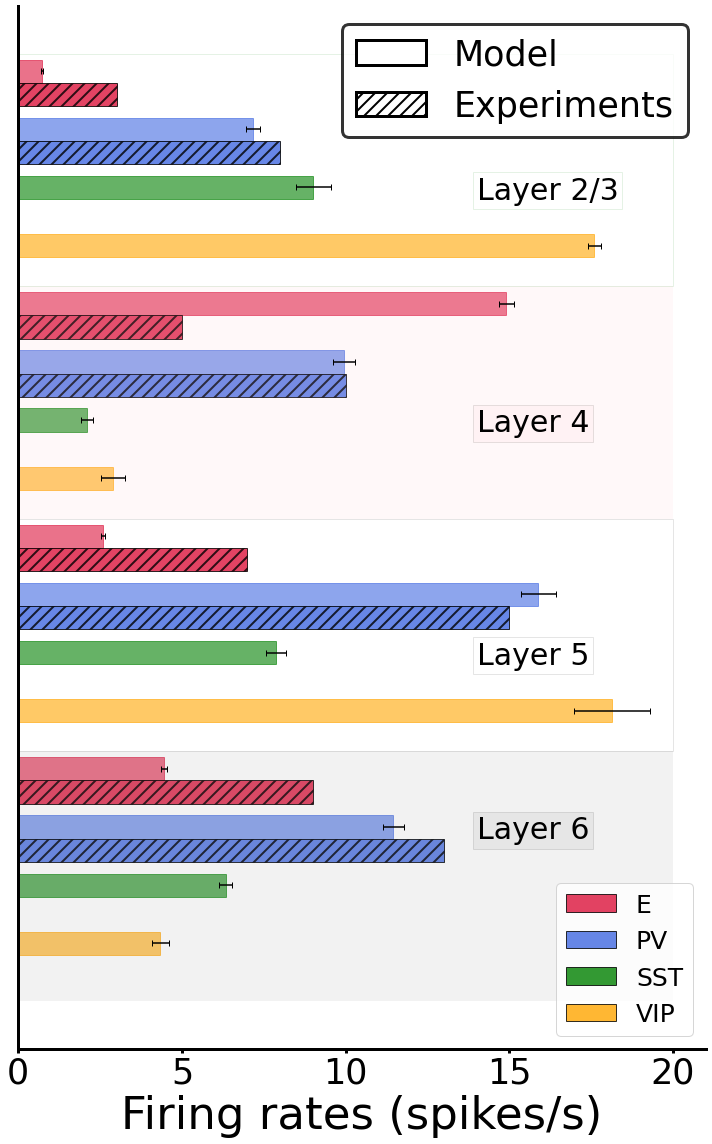

In [47]:
#I call the plot with the values I need: in this case the mean FR that I computed before
plot_meanFR(N,errors,m_e23,m_pv23,m_sst23,m_vip23,m_e4,m_pv4,m_sst4,m_vip4,m_e5,m_pv5,m_sst5,m_vip5,m_e6,m_pv6,m_sst6,m_vip6
)